# Credit Data Preprocessing
## Author: Alex Davis
## Date: 01/12/2023

The purpose of this script is to explore and preprocess the credit dataset for future modeling. 
This is strictly cleaning. If additional feature engineering is required, it will be 
addressed later.

## Import Packages

In [1]:
# packages for data cleaning
import pandas as pd
import numpy as np

#packages for data visualization
import matplotlib.pyplot as plt

## Import Data

In [2]:
#import data
data = pd.read_csv("data/credit_data.csv")

C:\Users\adavi\AppData\Local\Temp\ipykernel_21004\465553757.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/credit_data.csv")


In [4]:
#view first 5 rows of the data
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [5]:
#investigate data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
#check for missing values in each field
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Right off the bat, there are several problems with this dataset.
1. Size: Many irrelevant columns and features (such as PII).
2. Many columns with missing values.
3. Standardization: Columns with quantitative data are being read as objects, meaning there are errors. 

## Remove Irrelevant Columns
There are several columns that we can immediatley drop, such as name, that won't be need for further analysis. However, we will keep customer ID, as we need a unique identifier that can help us fill in missing values.

In [8]:
#list of columns that I we can certainly eliminate
columns_to_drop = ["ID", "Month", "Name", "Occupation", "SSN", "Payment_Behaviour", "Type_of_Loan"]

#drop columns from original dataframe
clean_data = data.drop(columns = columns_to_drop)
clean_data.head()

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,312.4940887,Good
1,CUS_0xd40,23,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,284.6291625,Good
2,CUS_0xd40,-500,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,331.2098629,Good
3,CUS_0xd40,23,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,223.4513097,Good
4,CUS_0xd40,23,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,341.489231,Good


## Correcting Data Types
Most of the fields are quantitative, but are being read as objects/strings. This is likely due to errors such as special characters making their way into these fields. We will ensure these characters are removed and that these fields are being read as integers/floats.

In [9]:
#display data types
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [10]:
#for columns that are meant to be intergers, clean out characters and change to int
#we use the regular expression "^A-Za-z0-9" to represent all characters and special characters
clean_data['Age'] = clean_data['Age'].str.replace(r'[^A-Za-z0-9]', '', regex=True).astype('Int32')
clean_data['Num_of_Loan'] = clean_data['Num_of_Loan'].str.replace(r'[^A-Za-z0-9]', '', regex=True).astype('Int32')
clean_data['Num_of_Delayed_Payment'] = clean_data['Num_of_Delayed_Payment'].str.replace(r'[^A-Za-z0-9]', '', regex=True).astype('Int32')

#we get an error when trying to clean special characters from "Num_Credit_Inquiries" because there are none, see we can just correct the type
clean_data['Num_Credit_Inquiries'] = clean_data['Num_Credit_Inquiries'].astype('Int32')

In [11]:
#for columns that are meant to be floats, clean out characters and change to float
clean_data['Annual_Income'] = clean_data['Annual_Income'].str.replace(r'[^A-Za-z0-9]', '', regex=True).astype('float')
clean_data['Amount_invested_monthly'] = clean_data['Amount_invested_monthly'].str.replace(r'[^A-Za-z0-9]', '', regex=True).astype('float')
clean_data['Monthly_Balance'] = clean_data['Monthly_Balance'].str.replace(r'[^A-Za-z0-9]', '', regex=True).astype('float')
clean_data['Outstanding_Debt'] = clean_data['Outstanding_Debt'].str.replace(r'[^A-Za-z0-9]', '', regex=True).astype('float')

In [12]:
#verify data types are now correct
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  Int32  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  Int32  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   Int32  
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      98035 non-null   Int32  
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

## Missing Values and Outliers

### Age
The 'Age' field has 2 problems: missing values and data errors (such as age being 500 or negative).

To ensure there are no errors with the age columns, we will create a lookup table using the customers mode age. For example, all but one entry for customer CUS_0xd40 is 23, with one error of 500. By using the mode age, we avoid this error.

In [13]:
#returns the mode age for each customer into a dataframe
age_lookup = clean_data.groupby(["Customer_ID"])['Age'].agg(pd.Series.mode)
age_lookup = age_lookup.to_frame()

#print mode ages for each customer
print(age_lookup)

                  Age
Customer_ID          
CUS_0x1000         17
CUS_0x1009         26
CUS_0x100b   [18, 19]
CUS_0x1011         44
CUS_0x1013         44
...               ...
CUS_0xff3          55
CUS_0xff4          37
CUS_0xff6          19
CUS_0xffc          17
CUS_0xffd          29

[12500 rows x 1 columns]


In [14]:
#since we are calculating the mode, more than one can be returned
#if two ages were returned, use the first
mode_ages= []

#if the mode age is an integer, return said integer
#if the mode age is a list of ages, take the first age in the list
for age in age_lookup["Age"]:
    if type(age) == np.int32:
        correct_age = age
        mode_ages.append(correct_age) 
    else: 
        correct_age = age[0]
        mode_ages.append(correct_age)

#add results to our age lookup table
age_lookup["Age"] = mode_ages

In [15]:
#verify the function works, when two ages were returned, mode_age identifies the lower age
print(age_lookup)

             Age
Customer_ID     
CUS_0x1000    17
CUS_0x1009    26
CUS_0x100b    18
CUS_0x1011    44
CUS_0x1013    44
...          ...
CUS_0xff3     55
CUS_0xff4     37
CUS_0xff6     19
CUS_0xffc     17
CUS_0xffd     29

[12500 rows x 1 columns]


In [16]:
#merge the dataframe with the age lookup table on 'Customer_ID'
clean_data = pd.merge(clean_data, age_lookup, on = "Customer_ID", how = "left")

#drop the original age column and rename the new age column to 'Age'
clean_data = clean_data.drop(columns = ["Age_x"])
clean_data = clean_data.rename(columns = {"Age_y": "Age"})

#verify the data merged and dropped correctly
clean_data.head(5)

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age
0,CUS_0xd40,1911412.0,1824.843333,3,4,3,4,3,7,11.27,...,_,80998.0,26.822620,22 Years and 1 Months,No,49.574949,8.041530e+09,3.124941e+09,Good,23
1,CUS_0xd40,1911412.0,NaN,3,4,3,4,-1,<NA>,11.27,...,Good,80998.0,31.944960,NaN,No,49.574949,1.182802e+09,2.846292e+09,Good,23
2,CUS_0xd40,1911412.0,NaN,3,4,3,4,3,7,0.00,...,Good,80998.0,28.609352,22 Years and 3 Months,No,49.574949,8.169952e+09,3.312099e+09,Good,23
3,CUS_0xd40,1911412.0,NaN,3,4,3,4,5,4,6.27,...,Good,80998.0,31.377862,22 Years and 4 Months,No,49.574949,1.994581e+09,2.234513e+09,Good,23
4,CUS_0xd40,1911412.0,1824.843333,3,4,3,4,6,<NA>,11.27,...,Good,80998.0,24.797347,22 Years and 5 Months,No,49.574949,4.142015e+09,3.414892e+08,Good,23


In [17]:
#assure there are no outliers by subsetting the dataset to only possible ages (18-99)
clean_data = clean_data.loc[(clean_data["Age"] >= 18) & (clean_data["Age"]<= 99)]

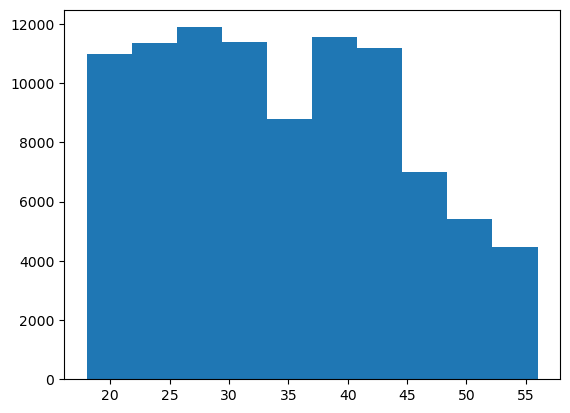

In [18]:
#distribution of age
plt.hist(clean_data["Age"])
plt.show()

### Monthly Salary
Next, we must address the missing values for inhand salary for each customer. 

If the customer salary is identified at some point, we will use that value. If it is not, missing salaries will be dropped as we can not make assumptions about salary.

In [19]:
#create table with each customers monthly inhand salary by removing missing values and duplicates
salary_lookup = clean_data[["Customer_ID","Monthly_Inhand_Salary"]].dropna()
salary_lookup = salary_lookup.drop_duplicates(subset = ["Customer_ID"])

#print our salary lookup table
print(salary_lookup)

      Customer_ID  Monthly_Inhand_Salary
0       CUS_0xd40            1824.843333
8      CUS_0x21b1            3037.986667
16     CUS_0x2dbc           12187.220000
24     CUS_0xb891            2612.490833
32     CUS_0x1cdb            2853.309167
...           ...                    ...
99960  CUS_0x372c            3468.315833
99968   CUS_0xf16            1528.029167
99976  CUS_0xaf61            3097.008333
99984  CUS_0x8600            1929.906667
99992  CUS_0x942c            3359.415833

[11763 rows x 2 columns]


In [20]:
#merge the dataframe with our salary lookup table on 'Customer_ID'
clean_data = pd.merge(clean_data, salary_lookup, on = "Customer_ID", how = "left")

#drop the original salary column and rename the new salary column
clean_data = clean_data.drop(columns = ["Monthly_Inhand_Salary_x"])
clean_data = clean_data.rename(columns = {"Monthly_Inhand_Salary_y": "Monthly_Inhand_Salary"})

#verify the data merged and dropped correctly
clean_data.head()

,Customer_ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Monthly_Inhand_Salary
0,CUS_0xd40,1911412.0,3,4,3,4,3,7,11.27,4,...,80998.0,26.822620,22 Years and 1 Months,No,49.574949,8.041530e+09,3.124941e+09,Good,23,1824.843333
1,CUS_0xd40,1911412.0,3,4,3,4,-1,<NA>,11.27,4,...,80998.0,31.944960,NaN,No,49.574949,1.182802e+09,2.846292e+09,Good,23,1824.843333
2,CUS_0xd40,1911412.0,3,4,3,4,3,7,0.00,4,...,80998.0,28.609352,22 Years and 3 Months,No,49.574949,8.169952e+09,3.312099e+09,Good,23,1824.843333
3,CUS_0xd40,1911412.0,3,4,3,4,5,4,6.27,4,...,80998.0,31.377862,22 Years and 4 Months,No,49.574949,1.994581e+09,2.234513e+09,Good,23,1824.843333
4,CUS_0xd40,1911412.0,3,4,3,4,6,<NA>,11.27,4,...,80998.0,24.797347,22 Years and 5 Months,No,49.574949,4.142015e+09,3.414892e+08,Good,23,1824.843333


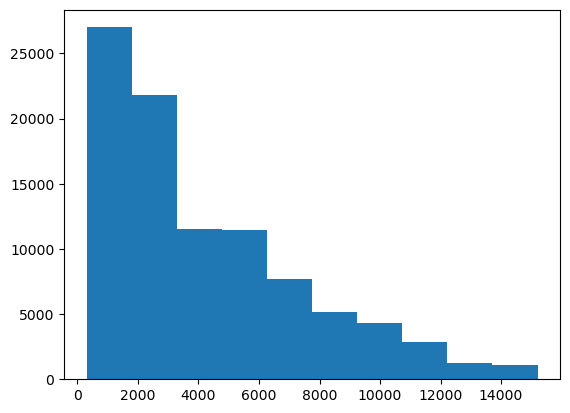

In [21]:
#distribution of monthly inhand salary
plt.hist(clean_data["Monthly_Inhand_Salary"])
plt.show()

### Number of Delayed Payments
Next, we must fill in missing values for the number of delayed payments. Since this can vary month to month for a single customer, we will use the customer average number of delayed payments.

In [22]:
#create a delayed payments lookup table by dropping missing values
delay_pay_lookup = clean_data[["Customer_ID", "Num_of_Delayed_Payment"]].dropna()

In [23]:
#for each customer, calculate the average number of delayed payments and save them into a dataframe
delay_pay_lookup = delay_pay_lookup.groupby(["Customer_ID"]).mean()
delay_pay_lookup = pd.DataFrame(delay_pay_lookup)

#display the delayed payments lookup table
print(delay_pay_lookup)

             Num_of_Delayed_Payment
Customer_ID                        
CUS_0x1009                   234.25
CUS_0x100b                    7.375
CUS_0x1011                     14.5
CUS_0x1013                 8.428571
CUS_0x1015                    9.125
...                             ...
CUS_0xfea                     2.125
CUS_0xff3                     8.625
CUS_0xff4                    12.125
CUS_0xff6                       4.0
CUS_0xffd                 11.428571

[11763 rows x 1 columns]


In [24]:
#merge the original dataframe with the delayed payments lookup table on 'Customer_ID'
clean_data = pd.merge(clean_data, delay_pay_lookup, on = "Customer_ID", how = "left")

#drop the original delayed payments columns and rename the new delayed payments column
clean_data = clean_data.drop(columns = ["Num_of_Delayed_Payment_x"])
clean_data = clean_data.rename(columns = {"Num_of_Delayed_Payment_y": "Avg_Num_of_Delayed_Payment"})

#verify the data merged and dropped correctly
clean_data.head(5)

,Customer_ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Monthly_Inhand_Salary,Avg_Num_of_Delayed_Payment
0,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,4,_,...,26.822620,22 Years and 1 Months,No,49.574949,8.041530e+09,3.124941e+09,Good,23,1824.843333,6.0
1,CUS_0xd40,1911412.0,3,4,3,4,-1,11.27,4,Good,...,31.944960,NaN,No,49.574949,1.182802e+09,2.846292e+09,Good,23,1824.843333,6.0
2,CUS_0xd40,1911412.0,3,4,3,4,3,0.00,4,Good,...,28.609352,22 Years and 3 Months,No,49.574949,8.169952e+09,3.312099e+09,Good,23,1824.843333,6.0
3,CUS_0xd40,1911412.0,3,4,3,4,5,6.27,4,Good,...,31.377862,22 Years and 4 Months,No,49.574949,1.994581e+09,2.234513e+09,Good,23,1824.843333,6.0
4,CUS_0xd40,1911412.0,3,4,3,4,6,11.27,4,Good,...,24.797347,22 Years and 5 Months,No,49.574949,4.142015e+09,3.414892e+08,Good,23,1824.843333,6.0


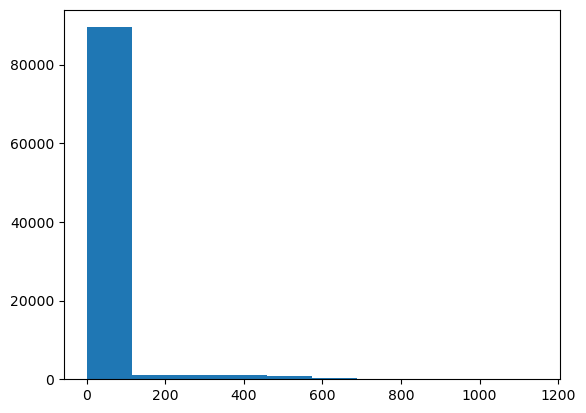

In [25]:
#distributio of number of delayed payments
plt.hist(clean_data["Avg_Num_of_Delayed_Payment"])
plt.show()

In [32]:
#the distribution of delayed payments is heavily skewed by those who have missed hundreds of payments
#subset the dataset to those who have no more than 40 delayed payments
clean_data = clean_data[clean_data["Avg_Num_of_Delayed_Payment"] <= 40]

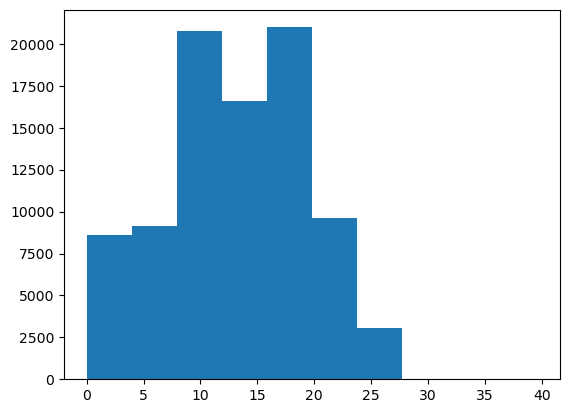

In [33]:
#assure no remaining outliers
plt.hist(clean_data["Avg_Num_of_Delayed_Payment"])
plt.show()

### Number of Credit Inquiries
There are a number of missing values for number of credit inquires. Since this is unlikely to change in just a few months of data for a customer, we will use the mode for each customer to fill in the missing values.

In [34]:
#create credit inquiry lookup table by calculating the mode number of inquiries for each customer and saving them into a dataframe
inquiry_lookup = clean_data.groupby(["Customer_ID"])['Num_Credit_Inquiries'].agg(pd.Series.mode)
inquiry_lookup = inquiry_lookup.to_frame()

#view the credit inquiry lookup table
print(inquiry_lookup)

            Num_Credit_Inquiries
Customer_ID                     
CUS_0x100b                     1
CUS_0x1011                     7
CUS_0x1013                     3
CUS_0x1015                     9
CUS_0x1026                     3
...                          ...
CUS_0xfea                      3
CUS_0xff3                      5
CUS_0xff4                      5
CUS_0xff6                      2
CUS_0xffd                      7

[11102 rows x 1 columns]


In [35]:
#since we are calculating the mode, more than one can be returned
#if two numbers were returned, use the first
mode_ages= []
mode_inquiries = []

#if the mode number is an integer, return said integer
#if the mode number is a list of numbers, take the first number in the list
for value in inquiry_lookup["Num_Credit_Inquiries"]:
    if type(value) == np.int32:
        correct_value = value
        mode_inquiries.append(correct_value) 
    else: 
        correct_value = value[0]
        mode_inquiries.append(correct_value)

#add the correct number of inquires to our lookup table
inquiry_lookup["Num_Credit_Inquiries"] = mode_inquiries

In [36]:
#verify the function works, when two values were returned, mode_inquiries identifies the lower value
print(inquiry_lookup.value_counts())

Num_Credit_Inquiries
4                       1385
3                       1116
2                       1009
1                        940
7                        896
6                        883
8                        868
0                        865
5                        627
9                        566
11                       563
10                       524
12                       485
13                       138
14                        97
15                        71
16                        40
17                        29
Name: count, dtype: int64


In [37]:
#merge the original dataframe with the credit inquiry lookup table on 'Customer_ID'
clean_data = pd.merge(clean_data, inquiry_lookup, on = "Customer_ID", how = "left")

#drop the original inquiry column and rename the new inquiry column
clean_data = clean_data.drop(columns = ["Num_Credit_Inquiries_x"])
clean_data = clean_data.rename(columns = {"Num_Credit_Inquiries_y": "Num_Credit_Inquiries"})

#verify the data merged and dropped correctly
clean_data.head()

,Customer_ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Monthly_Inhand_Salary,Avg_Num_of_Delayed_Payment,Num_Credit_Inquiries
0,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,_,80998.0,...,22 Years and 1 Months,No,49.574949,8.041530e+09,3.124941e+09,Good,23,1824.843333,6.0,4
1,CUS_0xd40,1911412.0,3,4,3,4,-1,11.27,Good,80998.0,...,NaN,No,49.574949,1.182802e+09,2.846292e+09,Good,23,1824.843333,6.0,4
2,CUS_0xd40,1911412.0,3,4,3,4,3,0.00,Good,80998.0,...,22 Years and 3 Months,No,49.574949,8.169952e+09,3.312099e+09,Good,23,1824.843333,6.0,4
3,CUS_0xd40,1911412.0,3,4,3,4,5,6.27,Good,80998.0,...,22 Years and 4 Months,No,49.574949,1.994581e+09,2.234513e+09,Good,23,1824.843333,6.0,4
4,CUS_0xd40,1911412.0,3,4,3,4,6,11.27,Good,80998.0,...,22 Years and 5 Months,No,49.574949,4.142015e+09,3.414892e+08,Good,23,1824.843333,6.0,4


### Credit History Age
In this dataset, credit history is presented as a block of text, making it very difficult to use the exact age of credit for later modeling. There are also a number of missing values. To roughly estimate the age of credit, we can easily extract the number of years, and then fill in the missing values. We lose some value here, but the state of this field makes it very difficult.

This overlaps with feature engineering, but must do it to effectivley clean our dataset.

In [38]:
#create an empty list to store the years of credit that we extract
Years_of_Credit = []

#if text if given describing the age of credit, extract the year and append to the list above
#if no text is given, append a null value
for string in clean_data["Credit_History_Age"]:
    if type(string) == str:
        
        new_string = string[0:2]
        Years_of_Credit.append(new_string)
        
    else:
        
        Years_of_Credit.append(string)
        
 
#use our list of years of credit to create a new featuer in the original dataset 
clean_data["Years_of_Credit"] = Years_of_Credit

#view the new feature
print(clean_data["Years_of_Credit"])

0         22
1        NaN
2         22
3         22
4         22
        ... 
88811     31
88812     31
88813     31
88814     31
88815     31
Name: Years_of_Credit, Length: 88816, dtype: object


In [39]:
#create a years of credit lookup table by dropping nulls and duplicates
credit_age_lookup = clean_data[["Customer_ID","Years_of_Credit"]].dropna()
credit_age_lookup = credit_age_lookup.drop_duplicates(subset = ["Customer_ID"])

#view our years of credit lookup table
print(credit_age_lookup)

      Customer_ID Years_of_Credit
0       CUS_0xd40              22
8      CUS_0x21b1              26
16     CUS_0x2dbc              17
24     CUS_0xb891              17
32     CUS_0x1cdb              30
...           ...             ...
88776  CUS_0x372c              28
88785   CUS_0xf16              21
88792  CUS_0xaf61              29
88800  CUS_0x8600              5 
88808  CUS_0x942c              31

[11102 rows x 2 columns]


In [40]:
#merge the original dataframe with the years of credit lookup table on 'Customer_ID'
clean_data = pd.merge(clean_data, credit_age_lookup, on = "Customer_ID", how = "left")

#drop the original years of credit column and rename the new years of credit column
clean_data = clean_data.drop(columns = ["Years_of_Credit_x"])
clean_data = clean_data.rename(columns = {"Years_of_Credit_y": "Years_of_Credit"})

#verify the data merged and dropped correctly
clean_data.head()

,Customer_ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Monthly_Inhand_Salary,Avg_Num_of_Delayed_Payment,Num_Credit_Inquiries,Years_of_Credit
0,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,_,80998.0,...,No,49.574949,8.041530e+09,3.124941e+09,Good,23,1824.843333,6.0,4,22
1,CUS_0xd40,1911412.0,3,4,3,4,-1,11.27,Good,80998.0,...,No,49.574949,1.182802e+09,2.846292e+09,Good,23,1824.843333,6.0,4,22
2,CUS_0xd40,1911412.0,3,4,3,4,3,0.00,Good,80998.0,...,No,49.574949,8.169952e+09,3.312099e+09,Good,23,1824.843333,6.0,4,22
3,CUS_0xd40,1911412.0,3,4,3,4,5,6.27,Good,80998.0,...,No,49.574949,1.994581e+09,2.234513e+09,Good,23,1824.843333,6.0,4,22
4,CUS_0xd40,1911412.0,3,4,3,4,6,11.27,Good,80998.0,...,No,49.574949,4.142015e+09,3.414892e+08,Good,23,1824.843333,6.0,4,22


In [41]:
#format the years of credit feature as an integer
clean_data["Years_of_Credit"] = clean_data["Years_of_Credit"].astype(int)

#if the age of credit was not given, drop the observation
clean_data = clean_data.drop(columns = "Credit_History_Age")

### Monthly Balance and Amount Invested Monthly
Both of these fields can vary from month to month, and can vary by significant degrees. There are not many missing values for these fields (monthly balance: 1200 & Amount Invested Monthly: 4479). Since using metrics such as the mean will eliminate the variance in these fields, and they do not have a significant number of missing values, we can simply drop rows with missing values.

In [42]:
#if the observation is missing a value for monthly balance and/or amount invested monthly, drop that observation
clean_data = clean_data.dropna(subset = ["Monthly_Balance", "Amount_invested_monthly"])

### Credit Mix

While the 'Credit Mix' field does not contain null values, it is still missing a significant amount of values with many showing '_'.

We must see if we can replace these values with the correct rating (bad, standard, or good).

In [48]:
#display the amount of times each value in 'credit_mix' are used
clean_data["Credit_Mix"].value_counts()

Credit_Mix
Standard    29608
Good        21347
_           16654
Bad         14776
Name: count, dtype: int64

In [50]:
#create a credit mix lookup table by replacing '_' with null values, and then dropping nulls and dupliactes
credit_mix_lookup = clean_data[["Customer_ID","Credit_Mix"]]

#replace '_' with null values
credit_mix_lookup["New_Credit_Mix"] = credit_mix_lookup["Credit_Mix"].replace("_", np.nan)

#view credit mix lookup table
print(credit_mix_lookup)

      Customer_ID Credit_Mix New_Credit_Mix
0       CUS_0xd40          _            NaN
1       CUS_0xd40       Good           Good
2       CUS_0xd40       Good           Good
3       CUS_0xd40       Good           Good
4       CUS_0xd40       Good           Good
...           ...        ...            ...
87259  CUS_0x9d41       Good           Good
87260  CUS_0x9d41       Good           Good
87261  CUS_0x9d41       Good           Good
87262  CUS_0x9d41       Good           Good
87263  CUS_0x9d41       Good           Good

[82385 rows x 3 columns]


C:\Users\adavi\AppData\Local\Temp\ipykernel_21004\3062448392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_mix_lookup["New_Credit_Mix"] = credit_mix_lookup["Credit_Mix"].replace("_", np.nan)


In [51]:
#drop nulls and duplicates to finish lookup table
credit_mix_lookup = credit_mix_lookup.dropna()
credit_mix_lookup = credit_mix_lookup.drop_duplicates(subset = ["Customer_ID"])

In [52]:
#merge the original dataframe with the credit mix lookup table on 'Customer_ID'
clean_data = pd.merge(clean_data, credit_mix_lookup, on = "Customer_ID", how = "left")

#drop the original credit mix columns and rename the new credit mix column
clean_data = clean_data.drop(columns = ["Credit_Mix_x", "Credit_Mix_y"])
clean_data = clean_data.rename(columns = {"New_Credit_Mix": "Credit_Mix"})

#verify the data merged and dropped correctly
clean_data.head()

,Customer_ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Monthly_Inhand_Salary,Avg_Num_of_Delayed_Payment,Num_Credit_Inquiries,Years_of_Credit,Credit_Mix
0,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,80998.0,26.822620,...,49.574949,8.041530e+09,3.124941e+09,Good,23,1824.843333,6.0,4,22,Good
1,CUS_0xd40,1911412.0,3,4,3,4,-1,11.27,80998.0,31.944960,...,49.574949,1.182802e+09,2.846292e+09,Good,23,1824.843333,6.0,4,22,Good
2,CUS_0xd40,1911412.0,3,4,3,4,3,0.00,80998.0,28.609352,...,49.574949,8.169952e+09,3.312099e+09,Good,23,1824.843333,6.0,4,22,Good
3,CUS_0xd40,1911412.0,3,4,3,4,5,6.27,80998.0,31.377862,...,49.574949,1.994581e+09,2.234513e+09,Good,23,1824.843333,6.0,4,22,Good
4,CUS_0xd40,1911412.0,3,4,3,4,6,11.27,80998.0,24.797347,...,49.574949,4.142015e+09,3.414892e+08,Good,23,1824.843333,6.0,4,22,Good


## Review Cleaned Data

In [53]:
#quality check each field is the correct data type
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82385 entries, 0 to 82384
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 82385 non-null  object 
 1   Annual_Income               82385 non-null  float64
 2   Num_Bank_Accounts           82385 non-null  int64  
 3   Num_Credit_Card             82385 non-null  int64  
 4   Interest_Rate               82385 non-null  int64  
 5   Num_of_Loan                 82385 non-null  Int32  
 6   Delay_from_due_date         82385 non-null  int64  
 7   Changed_Credit_Limit        82385 non-null  float64
 8   Outstanding_Debt            82385 non-null  float64
 9   Credit_Utilization_Ratio    82385 non-null  float64
 10  Payment_of_Min_Amount       82385 non-null  object 
 11  Total_EMI_per_month         82385 non-null  float64
 12  Amount_invested_monthly     82385 non-null  float64
 13  Monthly_Balance             823

In [54]:
#ensure that there are no more missing values
clean_data.isnull().sum()

Customer_ID                   0
Annual_Income                 0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Delay_from_due_date           0
Changed_Credit_Limit          0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly       0
Monthly_Balance               0
Credit_Score                  0
Age                           0
Monthly_Inhand_Salary         0
Avg_Num_of_Delayed_Payment    0
Num_Credit_Inquiries          0
Years_of_Credit               0
Credit_Mix                    0
dtype: int64

In [55]:
#view first 10 rows of the clean dataset
clean_data.head(10)

,Customer_ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Monthly_Inhand_Salary,Avg_Num_of_Delayed_Payment,Num_Credit_Inquiries,Years_of_Credit,Credit_Mix
0,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,80998.0,26.822620,...,49.574949,8.041530e+09,3.124941e+09,Good,23,1824.843333,6.0,4,22,Good
1,CUS_0xd40,1911412.0,3,4,3,4,-1,11.27,80998.0,31.944960,...,49.574949,1.182802e+09,2.846292e+09,Good,23,1824.843333,6.0,4,22,Good
2,CUS_0xd40,1911412.0,3,4,3,4,3,0.00,80998.0,28.609352,...,49.574949,8.169952e+09,3.312099e+09,Good,23,1824.843333,6.0,4,22,Good
3,CUS_0xd40,1911412.0,3,4,3,4,5,6.27,80998.0,31.377862,...,49.574949,1.994581e+09,2.234513e+09,Good,23,1824.843333,6.0,4,22,Good
4,CUS_0xd40,1911412.0,3,4,3,4,6,11.27,80998.0,24.797347,...,49.574949,4.142015e+09,3.414892e+08,Good,23,1824.843333,6.0,4,22,Good
5,CUS_0xd40,1911412.0,3,4,3,4,8,9.27,80998.0,27.262259,...,49.574949,6.243017e+09,3.404792e+09,Good,23,1824.843333,6.0,4,22,Good
6,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,80998.0,22.537593,...,49.574949,1.783441e+09,2.445653e+09,Good,23,1824.843333,6.0,4,22,Good
7,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,80998.0,23.933795,...,49.574949,2.478522e+09,3.581242e+09,Standard,23,1824.843333,6.0,4,22,Good
8,CUS_0x21b1,3484784.0,2,4,6,1,3,5.42,60503.0,24.464031,...,18.816215,1.042918e+09,4.706906e+09,Standard,28,3037.986667,2.25,2,26,Good
9,CUS_0x21b1,3484784.0,2,4,6,1,7,7.42,60503.0,38.550848,...,18.816215,4.039124e+09,4.845912e+09,Good,28,3037.986667,2.25,2,26,Good


## Save Cleaned Data

Now that we have drop irrelevant fields, addressed missng values, and have standardized our data, we can save our processed dataset.

In [56]:
#save our clean data to the data folder
clean_data.to_csv('data/credit_data_preprocessed.csv', index=False)